# Q3: Effect of Activation Functions on CNN Performance  
## Experiment: LeakyReLU Activation

This notebook investigates how the **LeakyReLU activation function** affects the
performance of a convolutional neural network on the Fashion-MNIST dataset.

The architecture, dataset, optimiser and training procedure are kept identical
to other experiments (ReLU, Tanh and Sigmoid) to ensure a fair comparison.


## Experimental Setup

- Dataset: Fashion-MNIST (10 classes)
- Input size: 28 × 28 grayscale images
- Architecture:
  - Conv2D (1 → 8), kernel size 3
  - MaxPooling (2 × 2)
  - Conv2D (8 → 16), kernel size 3
  - MaxPooling (2 × 2)
  - Fully connected layer (128 units)
  - Output layer (10 units)
- Loss function: CrossEntropyLoss
- Optimizer: Adam
- Learning rate: 0.01
- Epochs: 20
- Train/validation split: 80% / 20%

Only the **activation function** differs between experiments.


In [19]:
import sys
sys.path.append("..")

from functions import get_data, data_split_train_val

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt

In [20]:
# Load Fashion-MNIST (normalised to [0,1])
X, y = get_data("../data/fashion-mnist_test.csv")

# Train/validation split
X_train, X_val, y_train, y_val = data_split_train_val(X, y)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)

Train shape: (8000, 784)
Validation shape: (2000, 784)


In [21]:
# convert numpy arrays to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).long()

X_val_tensor = torch.from_numpy(X_val).float()
y_val_tensor = torch.from_numpy(y_val).long()

In [22]:
print("Before reshape:")
print("X_train_tensor shape:", X_train_tensor.shape)
print("X_val_tensor shape:", X_val_tensor.shape)

Before reshape:
X_train_tensor shape: torch.Size([8000, 784])
X_val_tensor shape: torch.Size([2000, 784])


In [23]:
num_train = X_train_tensor.shape[0]
num_val = X_val_tensor.shape[0]

print(num_train, num_val)

8000 2000


In [24]:
X_train_tensor = X_train_tensor.reshape(num_train, 1, 28, 28)
X_val_tensor = X_val_tensor.reshape(num_val, 1, 28, 28)
print("X_train_tensor reshape:", X_train_tensor.shape)
print("X_val_tensor reshape:", X_val_tensor.shape)

X_train_tensor reshape: torch.Size([8000, 1, 28, 28])
X_val_tensor reshape: torch.Size([2000, 1, 28, 28])


In [25]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [26]:
class CNN_LeakyReLU(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = nn.LeakyReLU()

        self.conv1 = nn.Conv2d(1, 8, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 16, 3)

        self.fc1 = nn.Linear(16*5*5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.activation(self.conv1(x))
        x = self.pool(x)

        x = self.activation(self.conv2(x))
        x = self.pool(x)

        x = torch.flatten(x, 1)

        x = self.activation(self.fc1(x))
        return self.fc2(x)

In [32]:
data = CNN_LeakyReLU()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(data.parameters(), lr=0.01)

In [33]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [34]:
epochs = 20

for epoch in range(epochs):
    optimizer.zero_grad()
    
    # Forward pass (training)
    outputs = data(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass
    loss.backward()
    optimizer.step()
    
    # Training accuracy
    train_preds = torch.argmax(outputs, 1)
    train_acc = (train_preds == y_train_tensor).float().mean().item()
    
    # Validation loss and accuracy
    with torch.no_grad():
        val_outputs = data(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_preds = torch.argmax(val_outputs, 1)
        val_acc = (val_preds == y_val_tensor).float().mean().item()
    
    # Store history
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    print(
        f"Epoch {epoch+1}/{epochs}, "
        f"Train Loss: {loss.item():.4f}, "
        f"Val Loss: {val_loss.item():.4f}, "
        f"Val Acc: {val_acc:.4f}"
    )

Epoch 1/20, Train Loss: 2.3037, Val Loss: 2.2445, Val Acc: 0.2600
Epoch 2/20, Train Loss: 2.2430, Val Loss: 2.0856, Val Acc: 0.5300
Epoch 3/20, Train Loss: 2.0868, Val Loss: 1.7813, Val Acc: 0.5770
Epoch 4/20, Train Loss: 1.7854, Val Loss: 1.3963, Val Acc: 0.6745
Epoch 5/20, Train Loss: 1.4030, Val Loss: 1.1439, Val Acc: 0.6060
Epoch 6/20, Train Loss: 1.1498, Val Loss: 1.3526, Val Acc: 0.5020
Epoch 7/20, Train Loss: 1.3893, Val Loss: 1.0895, Val Acc: 0.5865
Epoch 8/20, Train Loss: 1.0999, Val Loss: 1.2876, Val Acc: 0.5385
Epoch 9/20, Train Loss: 1.2925, Val Loss: 0.9859, Val Acc: 0.6670
Epoch 10/20, Train Loss: 1.0283, Val Loss: 0.9809, Val Acc: 0.6585
Epoch 11/20, Train Loss: 1.0373, Val Loss: 0.9621, Val Acc: 0.6685
Epoch 12/20, Train Loss: 1.0053, Val Loss: 0.8588, Val Acc: 0.7120
Epoch 13/20, Train Loss: 0.8855, Val Loss: 0.8486, Val Acc: 0.7065
Epoch 14/20, Train Loss: 0.8667, Val Loss: 0.8357, Val Acc: 0.7120
Epoch 15/20, Train Loss: 0.8561, Val Loss: 0.7789, Val Acc: 0.7350
Epoc

In [35]:
print("Final validation accuracy:", val_accuracies[-1])

Final validation accuracy: 0.7515000104904175


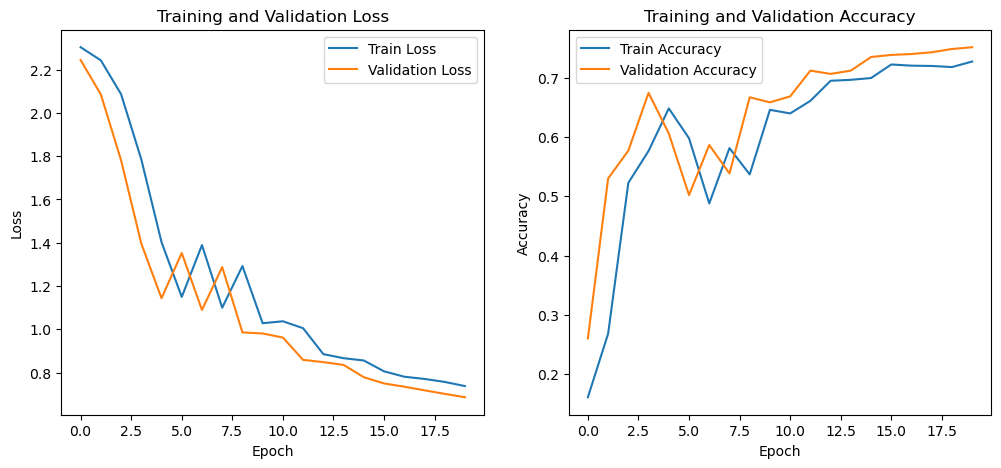

In [36]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

## Results: Leaky ReLU Activation

Leaky ReLU improves gradient flow for negative inputs and avoids dead neurons.
The model performs significantly better than Sigmoid but slightly worse than
standard ReLU in this experiment.